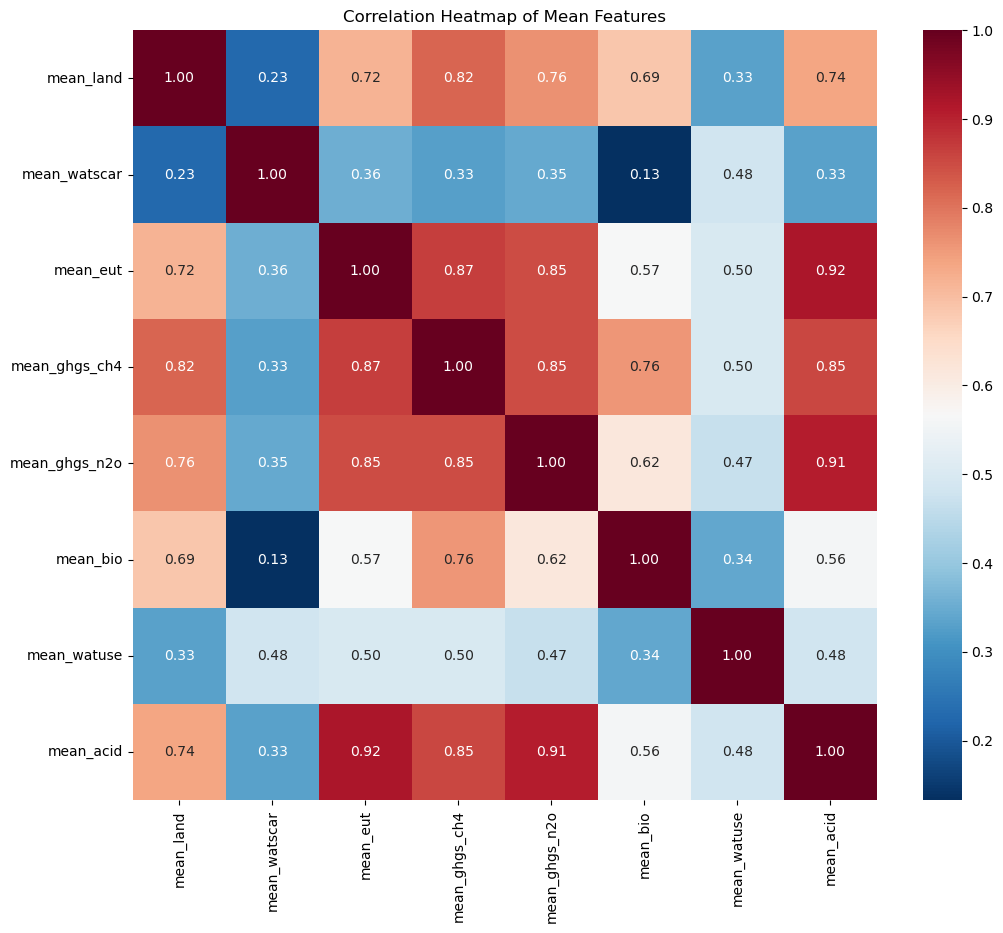

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('./Results_21Mar2022.csv', index_col=[0,1,2])

# Filter out numerical features that contain 'mean'
mean_features = [col for col in df.columns if 'mean' in col and df[col].dtype in ['float64', 'int64']]

# The correlation matrix of the selected features is calculated
mean_correlation_matrix = df[mean_features].corr()

# Use seaborn to draw a correlation heat map with color mapping set to 'RdBu_r'
plt.figure(figsize=(12, 10))
sns.heatmap(mean_correlation_matrix, annot=True, cmap='RdBu_r', fmt=".2f")

plt.title('Correlation Heatmap of Mean Features')

plt.show()


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler

# Load data
data = pd.read_csv('./Results_21Mar2022.csv')

# Separate numeric and non-numeric data
numerical_data = data.select_dtypes(include=[np.number])
non_numerical_data = data.select_dtypes(exclude=[np.number])

# grouping by the column of 'grouping' and calculating the average of numerical characteristics of each group
grouped_numerical_averages = numerical_data.groupby(data['grouping']).mean().reset_index()

# Combine the calculated average with the 'grouping' column of non-numerical data
final_data = pd.merge(non_numerical_data.drop_duplicates(subset=['grouping']), grouped_numerical_averages, on='grouping', how='right')

# Save the results to a new CSV file
final_data.to_csv('./Grouped_Averages.csv', index=False)

print("Data has been saved successfully to 'Grouped_Averages.csv'.")


Data has been saved successfully to 'Grouped_Averages.csv'.


In [3]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler


data = pd.read_csv('./Grouped_Averages.csv')

# 筛选出鱼食者，并且是我们关注的指标
fish_eaters = data[(data['diet_group'] == 'fish') & data['grouping'].str.contains('fish')].copy()
selected_columns = ['mean_ghgs', 'mean_ghgs_ch4', 'mean_ghgs_n2o', 'mean_bio', 'mean_eut', 'mean_land','mean_acid']

# 使用 .loc 更新 'age_sex'
fish_eaters.loc[:, 'age_sex'] = fish_eaters['grouping'].apply(lambda x: x.split('_')[2] + ' ' + x.split('_')[1])

# 数值型数据缩放到0-1范围
scaler = MinMaxScaler()
fish_eaters.loc[:, selected_columns] = scaler.fit_transform(fish_eaters[selected_columns])

# 保存处理后的数据到CSV文件
output_path = './Scaled_Fish_Eaters_Data.csv'
fish_eaters.to_csv(output_path, index=False)

print(f"Data saved to {output_path}")


Data saved to ./Scaled_Fish_Eaters_Data.csv


In [4]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler

# 加载数据
data = pd.read_csv('./Grouped_Averages.csv')

# 筛选出鱼食者，并且是我们关注的指标
fish_eaters = data[(data['diet_group'] == 'fish') & data['grouping'].str.contains('fish')].copy()
selected_columns = ['mean_ghgs', 'mean_ghgs_ch4', 'mean_ghgs_n2o', 'mean_bio', 'mean_eut', 'mean_land', 'mean_acid']

# 使用 .loc 更新 'age_sex'
fish_eaters.loc[:, 'age_sex'] = fish_eaters['grouping'].apply(lambda x: x.split('_')[2] + ' ' + x.split('_')[1])

# 数值型数据缩放到0-1范围
scaler = MinMaxScaler()
fish_eaters.loc[:, selected_columns] = scaler.fit_transform(fish_eaters[selected_columns])

# 选择要保留的列，包括 'grouping' 和 selected_columns
columns_to_keep = ['grouping'] + selected_columns
reduced_fish_eaters = fish_eaters[columns_to_keep]

# 保存处理后的数据到CSV文件
output_path = './Reduced_Scaled_Fish_Eaters_Data.csv'
reduced_fish_eaters.to_csv(output_path, index=False)

print(f"Data saved to {output_path}")


Data saved to ./Reduced_Scaled_Fish_Eaters_Data.csv


In [5]:
import pandas as pd

# Load the CSV file
df = pd.read_csv('./Reduced_Scaled_Fish_Eaters_Data.csv', header=None)

# Transpose data box
df_transposed = df.transpose()

# Save the converted data frame to a new CSV file
df_transposed.to_csv('./preRadar.csv', index=False)
